In [1]:
from metal.nn import NeuralNetwork
from metal.utils import train_test_split, to_categorical, normalize
from metal.utils import get_random_subsets, shuffle_data, Plot
from metal.utils.data_operation import accuracy_score
from metal.optimizers import StochasticGradientDescent,Adam
from metal.loss_functions import CrossEntropy
from metal.utils.misc import bar_widgets
from metal.layers.dense_ import Dense
from metal.layers.conv2D_ import Conv2D
from metal.layers.flatten_ import Flatten
from metal.layers.layer import Activation
from autograd.tensor import Tensor
from autograd.parameter import Parameter
from metal.models.convnet import ConvNet
import h5py
from metal.layers.batchnormalization_ import BatchNormalization


In [2]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import math 
import numpy as np


In [3]:
optimizer = Adam()
data = datasets.load_digits()
X = data.data
y = data.target
loss = CrossEntropy
print(X.shape,y.shape)
# Covnet to  one-hot encoding 
y = to_categorical(y.astype("int"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, seed = 1)

X_train = X_train.reshape((-1,1,8,8))
X_test = X_test.reshape((-1,1,8,8))

X_train = Parameter(X_train, requires_grad=False)
X_test = Parameter(X_test, requires_grad=False)
y_train = Parameter(y_train, requires_grad=False)
y_test = Parameter(y_test, requires_grad=False)
y_test.shape

(1797, 64) (1797,)


(718, 10)

In [4]:
covnet = ConvNet(optimizer=optimizer, loss=loss,  validation_data=(X_test,y_test))

In [5]:
covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, input_shape=(1,8,8), padding='same', seed=1))
covnet.add(Activation('relu'))
covnet.add(BatchNormalization())

covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, padding='same', seed=2))
covnet.add(Flatten())
covnet.add(BatchNormalization())
covnet.add(Dense(256, seed=4))
covnet.add(Activation('relu'))
covnet.add(Dense(10,seed=3))
covnet.add(Activation('softmax'))

In [6]:
train_err, val_err = covnet.fit(X_train, y_train, n_epochs=10, batch_size=64)


Training: 100% [------------------------------------------------] Time: 0:00:17


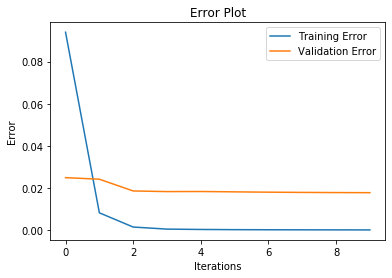

Accuracy: 0.9818941504178273


In [7]:
covnet.eval(X_test, y_test)

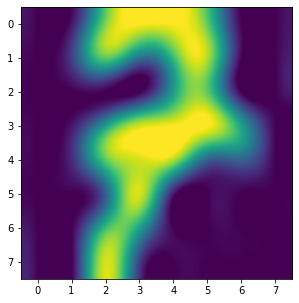

In [8]:
data_ = X_test[3].reshape(1,1,8,8)
plt.figure(figsize=(5,5))
plt.imshow(data_.data.reshape(data_.shape[-1],data_.shape[-2]), interpolation='lanczos')
plt.show()

In [9]:
covnet.predict(data_)

7